<a href="https://colab.research.google.com/github/Prabhnoor500/Parameter-Optimization-of-SVM-/blob/main/Parameter_Optimization_Of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.svm import SVC as svc 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import StratifiedKFold
import random

In [3]:
df = pd.read_csv("frog.csv")

In [4]:
df = df.drop(['Species','Family','Genus'], axis=1)

In [5]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,60


In [6]:
l = []
lk =[]
ln = []
le = []

In [7]:
dim = []

In [8]:
# df = df.sample(n=100)
# X = df.iloc[: , 0:-1 ]
# Y = df['default payment next month']

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25 ,random_state=8)

In [10]:
def f(k,n,e,X_train,X_test,y_train,y_test):
    model = svc(kernel=k,C=n,gamma=e)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    a = accuracy_score(y_test,y_pred)
    return a

In [11]:
def r(dfa):
    ba = 0
    bk = ""
    bnu= 0
    be = 0
    it = 1000
    kl = ['rbf','sigmoid','linear','poly']
    X = dfa.iloc[: , 0:-1 ]
    Y = dfa['RecordID']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 ,random_state=8)
    lit=[]
    for i in range(it):
        n = random.random()
        e = random.random()
        k = random.choice(kl)
        a = f(k,n,e, X_train, X_test, y_train, y_test)
        if i%10==0:
            lit.append(a)
        if(ba < a):
            ba = a
            bk = k
            bnu = n
            be = e  
    l.append(ba)
    lk.append(bk)
    ln.append(n)
    le.append(e)
    dim.append(lit)
    print(ba)    

In [12]:
l

[]

In [13]:
le

[]

In [14]:
lk

[]

In [15]:
ln

[]

In [16]:
i=0
while i<10:
    i+=1
    d = df.sample(n=100)
    r(d)  

0.5
0.6666666666666666
0.4666666666666667
0.5666666666666667
0.4
0.4666666666666667
0.5333333333333333
0.5
0.7333333333333333
0.5666666666666667


In [17]:
l_index = pd.DataFrame(['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10'])

In [18]:
import pandas as pd
ans=pd.DataFrame(columns=['Best Accuracy','Best Kernel','Best C','Best Gamma'])
ans['Best Accuracy'],ans['Best Kernel'],ans['Best C'],ans['Best Gamma']=l,lk,ln,le


In [19]:
data_cbind_all = pd.concat([l_index, # Cbind DataFrames
                            ans],
                           axis = 1)
data_cbind_all.columns = ['Samples', 'Best Accuracy', 'Best Kernel','Best C','Best Gamma']

In [20]:
file_name = 'best_frog.xlsx'
data_cbind_all.to_excel(file_name)


In [21]:
mx = 0;
ind = -1;
for i in range(10):
    if mx < data_cbind_all.at[i, 'Best Accuracy']:
        ind = i
        mx = data_cbind_all.at[i, 'Best Accuracy']

In [22]:
mx

0.7333333333333333

In [23]:
y_plot=dim[ind]

In [24]:
len(y_plot)

100

In [25]:
x_plot=list(range(0, 1000,10))

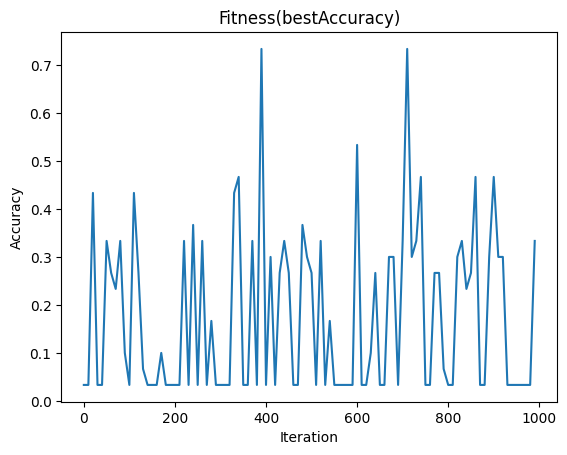

In [28]:
import matplotlib.pyplot as plt

plt.plot(x_plot, y_plot)
plt.xlabel("Iteration") # add X-axis label
plt.ylabel("Accuracy") # add Y-axis label
plt.title("Fitness(bestAccuracy)") 
plt.savefig('SVM.png')